# Sentiment Analysis with DistilBERT using HuggingFace
Sentiment Analysis is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.

- The IMDB dataset contains 25,000 movie reviews labeled by sentiment for training a model and 25,000 movie reviews for testing it.


<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/sentiment.jpg" width=1000>

### Transformers Architecture

<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/nlp6.2.jpg" width=1000>

## DistilBERT
DistilBERT is a smaller, faster and cheaper version of BERT. It has 40% smaller than BERT and runs 60% faster while preserving over 95% of BERT's performance.


DistilBERT (Distilled BERT) is a smaller and more efficient version of BERT (Bidirectional Encoder Representations from Transformers). The primary goal of DistilBERT is to reduce the size and computational requirements of BERT while preserving its essential capabilities. Here are some key differences between DistilBERT and BERT:

**Tokenizer:**
- BERT: BERT's tokenizer is an integral part of the model architecture. The BERT model includes both the transformer layers for processing the input data and the associated tokenization mechanisms within the same model structure. The tokenizer is not a separate, standalone component.When you use a BERT model, you typically utilize its built-in tokenizer (WordPiece tokenization) to preprocess and tokenize the input text.
- DistilBERT: DistilBERT's has not integrated tokenizer, so text MUST be tokenize before to feed the model.


**Model Size:**
- BERT: BERT models are large and contain a significant number of parameters. For instance, the original BERT-base model has 110 million parameters.
- DistilBERT: DistilBERT is a smaller model, designed to be more lightweight. It has only about 40% of the parameters of the BERT-base model.

**Training Process:**
- BERT: BERT is pre-trained on a large corpus of text using unsupervised learning. The pre-training involves predicting masked words in a sentence and learning contextualized representations.
- DistilBERT: DistilBERT is trained using a process called knowledge distillation. It is trained to reproduce the behavior of the larger BERT model. The idea is to transfer the knowledge encoded in the larger model to the smaller one.

**Computation Efficiency:**
- BERT: Due to its size, BERT models require significant computational resources for both training and inference. This can be a limitation in resource-constrained environments.
- DistilBERT: DistilBERT is designed to be more computationally efficient, making it suitable for deployment in scenarios where computational resources are limited.

**Performance:**
- BERT: Larger models like BERT often achieve state-of-the-art performance on various natural language processing (NLP) tasks, but they come with higher computational costs.
- DistilBERT: While DistilBERT is smaller and more computationally efficient, it may not perform as well as BERT on some tasks due to its reduced capacity. However, it still retains a significant portion of BERT's performance.

**Use Cases:**
- BERT: BERT is often used in research and applications where maximum performance is critical, such as in competitions and benchmarks.
- DistilBERT: DistilBERT is suitable for applications where there are resource constraints, and a balance between performance and efficiency is needed. It can be more practical for deployment in real-world scenarios.

<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/nlp6.3.jpg" width=1000>

**Introduction to DistilBERT:** DistilBERT, short for "Distill and BERT," is a compact version of the renowned BERT (Bidirectional Encoder Representations from Transformers) model.

**Model Architecture:** It reduces the number of layers and attention heads, resulting in a smaller and faster model.

**Parameter Reduction:** One of DistilBERT's key features is its parameter reduction strategy, achieved by distillation. This involves training the model on a combination of teacher (BERT) and student (DistilBERT).

**Efficiency and Speed:** By reducing the model's size and complexity, DistilBERT achieves a significant speedup during both training and inference.

In [36]:
!pip install -U transformers -q
!pip install -U accelerate -q
!pip install beautifulsoup4 -q

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

**pipeline** is a utility in the transformers library that simplifies the process of applying pre-trained models to various NLP tasks, such as text classification, named entity recognition, question answering, text generation, and more. It abstracts away much of the complexity involved in setting up and using these models, making it easier for developers to leverage state-of-the-art NLP capabilities in their applications

In [38]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")
data = ['i love you', 'i hate you']
sentiment_pipeline(data)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9998656511306763},
 {'label': 'NEGATIVE', 'score': 0.9991129040718079}]

In [39]:
sentiment_pipeline(data)[1]['label']

'NEGATIVE'

In [40]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/IMDB-Dataset6.csv

--2024-02-28 18:09:19--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/IMDB-Dataset6.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.191.66, 52.95.150.18, 52.95.144.6, ...
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.191.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66212309 (63M) [text/csv]
Saving to: ‘IMDB-Dataset6.csv.1’

IMDB-Dataset6.csv.1 100%[===================>]  63.14M  11.8MB/s    in 6.9s    

2024-02-28 18:09:27 (9.12 MB/s) - ‘IMDB-Dataset6.csv.1’ saved [66212309/66212309]



In [41]:
#path = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/IMDB-Dataset6.csv"
path = "IMDB-Dataset6.csv"

df = pd.read_csv(path)
df = df.sample(10_000).reset_index(drop=True)
df

,review,sentiment
0,If you love drive-in cheeze from the early '70...,positive
1,One measurement for the greatness of a movie i...,positive
2,The only reason I saw this movie was because i...,negative
3,"The ""Hunting Trilogy"" of Rabbit Fire (1951), R...",positive
4,Its a feel-good movie that made me feel good. ...,positive
...,...,...
9995,There are very few performers today who can ke...,positive
9996,When I first saw this film around 6 months ago...,positive
9997,An art student in Rome is possessed...or somet...,negative
9998,This was a really nice surprise. I was up late...,positive


In [42]:
df['sentiment'].value_counts()

negative    5046
positive    4954
Name: sentiment, dtype: int64

In [43]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [44]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
from bs4 import BeautifulSoup

def get_wordcounts(x):
    length = len(str(x).split())
    return length

def get_charcounts(x):
    s = x.split()
    x = ''.join(s)
    return len(x)

def get_avg_wordlength(x):
    count = get_charcounts(x)/get_wordcounts(x)
    return count

def get_stopwords_counts(x):
    l = len([t for t in x.split() if t in stopwords])
    return l

def remove_html_tags(x):
	return BeautifulSoup(x, 'lxml').get_text().strip() #html related string

In [45]:
# preprocessing
df['word_counts'] = df['review'].apply(lambda x: get_wordcounts(x))
df['char_counts'] = df['review'].apply(lambda x: get_charcounts(x))
df['avg_wordlength'] = df['review'].apply(lambda x: get_avg_wordlength(x))
df['stopwords_counts'] = df['review'].apply(lambda x: get_stopwords_counts(x))
df['review'] = df['review'].str.lower()
df['review'] = df['review'].apply(lambda x: remove_html_tags(x))

df

,review,sentiment,word_counts,char_counts,avg_wordlength,stopwords_counts
0,if you love drive-in cheeze from the early '70...,positive,188,942,5.010638,88
1,one measurement for the greatness of a movie i...,positive,166,725,4.367470,85
2,the only reason i saw this movie was because i...,negative,130,533,4.100000,54
3,"the ""hunting trilogy"" of rabbit fire (1951), r...",positive,93,500,5.376344,36
4,its a feel-good movie that made me feel good. ...,positive,47,203,4.319149,21
...,...,...,...,...,...,...
9995,there are very few performers today who can ke...,positive,348,1703,4.893678,174
9996,when i first saw this film around 6 months ago...,positive,145,662,4.565517,64
9997,an art student in rome is possessed...or somet...,negative,195,852,4.369231,87
9998,this was a really nice surprise. i was up late...,positive,324,1455,4.490741,144


In [46]:
df['sentiment'].value_counts() #balanced Binary Problem

negative    5046
positive    4954
Name: sentiment, dtype: int64

<Axes: >

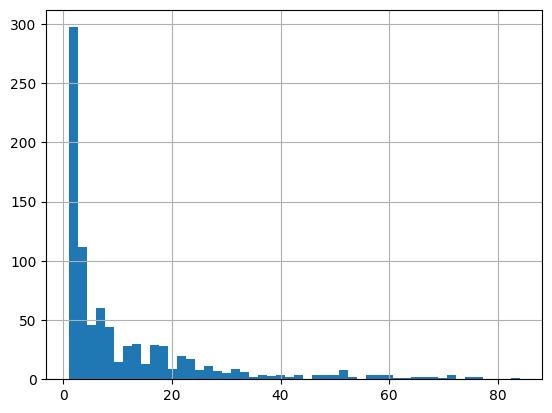

In [47]:
df['word_counts'].value_counts().hist(bins=50)

## Data Preparation for ML

In [48]:
# custom dataset -> evaluation/compute metrics -> training arguments -> trainer -> training -> testing

In [49]:
import torch
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split

In [50]:
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = torch.tensor(self.labels[idx])
        encoding = self.tokenizer(text, truncation=True,
                                  padding="max_length",
                                  max_length=self.max_len
                                  )
        return {
                'input_ids': encoding['input_ids'],
                'attention_mask': encoding['attention_mask'],
                'labels': label,
                }

https://huggingface.co/distilbert-base-uncased

DistilBERT is a transformers model, smaller and faster than BERT, which was pretrained on the same corpus in a self-supervised fashion, using the BERT base model as a teacher. This means it was pretrained on the raw texts only, with no humans labelling them in any way (which is why it can use lots of publicly available data) with an automatic process to generate inputs and labels from those texts using the BERT base model

### Distillation
In the context of Deep Learning (DL), distillation refers to a process where a large, complex neural network (the teacher model) transfers its knowledge to a smaller, more efficient model (the student model). The goal is to distill the valuable information, generalizations, and patterns learned by the sophisticated teacher model into a compact student model, which typically has fewer parameters. This knowledge transfer is achieved by training the student model to mimic not only the final predictions of the teacher model but also the internal representations or knowledge embedded within the teacher's layers. Distillation is often used to create lightweight models suitable for deployment on resource-constrained devices without sacrificing performance.

<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/distillation.png" width=1000>

In [51]:
# prepare tokenizer and model
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = 'distilbert-base-uncased'
device = "cuda"

tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [52]:
X = df['review'].tolist()

# manual Labeleconder
label2id = {'positive': 1, 'negative': 0}
y = df['sentiment'].map(label2id).tolist()

dataset = CustomDataset(X, y, tokenizer)

In [53]:
dataset[0].keys()

dict_keys(['input_ids', 'attention_mask', 'labels'])

In [54]:
train_dataset, test_dataset = train_test_split(dataset,
                                               test_size=0.2,
                                               random_state=42,
                                               )

In [55]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(example):
    labels = example.label_ids
    preds = example.predictions.argmax(-1)

    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc, "f1": f1}

In [56]:
from transformers import Trainer, TrainingArguments

batch_size = 16
learning_rate = 2e-5
model_name = "distilbert_finetuned_sentiment"

args = TrainingArguments(
                        output_dir = "output",
                        per_device_train_batch_size=batch_size,
                        per_device_eval_batch_size = batch_size,
                        learning_rate = learning_rate,
                        num_train_epochs = 1,
                        evaluation_strategy = 'epoch',
                        )

trainer = Trainer(
                  tokenizer = tokenizer,
                  model=model,
                  args=args,
                  train_dataset = train_dataset,
                  eval_dataset = test_dataset,
                  compute_metrics=compute_metrics,
                  )

In [57]:
# Takes 6 min
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.322800,0.232441,0.913500,0.913501


Checkpoint destination directory output/checkpoint-500 already exists and is non-empty. Saving will proceed but saved results may be invalid.


TrainOutput(global_step=500, training_loss=0.322775634765625, metrics={'train_runtime': 427.7662, 'train_samples_per_second': 18.702, 'train_steps_per_second': 1.169, 'total_flos': 1059739189248000.0, 'train_loss': 0.322775634765625, 'epoch': 1.0})

## Model Testing

In [58]:
#save tokenizer and model
model_name = "distilbert_finetuned_sentiment"

trainer.save_model(model_name)

In [59]:
text = "i love this product"
pipe = pipeline('sentiment-analysis', model_name)
pipe(text)

[{'label': 'LABEL_1', 'score': 0.9565536379814148}]

In [60]:
id2label = {1: 'positive', 0: 'negative'}

tok = AutoTokenizer.from_pretrained(model_name)
mod = AutoModelForSequenceClassification.from_pretrained(model_name)

def get_prediction(text):
    input_ids = tok.encode(text, return_tensors='pt')
    output = mod(input_ids)
    preds = torch.nn.functional.softmax(output.logits, dim=-1)
    prob = torch.max(preds).item()
    idx = torch.argmax(preds).item()
    sentiment = id2label[idx]

    return {'sentiment':sentiment, 'prob':prob}

In [61]:
text = "i love this product"
get_prediction(text)

{'sentiment': 'positive', 'prob': 0.9565536379814148}

In [62]:
text = "i hate this product"
get_prediction(text)

{'sentiment': 'negative', 'prob': 0.8342573046684265}

## Save Model

In [63]:
# #save tokenizer and model
# trainer.save_model(model_name)

In [64]:
# zip the folder
!zip -r distilbert_finetuned_setiment.zip "/content/distilbert_finetuned_sentiment"

updating: content/distilbert_finetuned_sentiment/ (stored 0%)
updating: content/distilbert_finetuned_sentiment/config.json (deflated 46%)
updating: content/distilbert_finetuned_sentiment/model.safetensors (deflated 8%)
updating: content/distilbert_finetuned_sentiment/training_args.bin (deflated 51%)
updating: content/distilbert_finetuned_sentiment/vocab.txt (deflated 53%)
updating: content/distilbert_finetuned_sentiment/tokenizer.json (deflated 71%)
updating: content/distilbert_finetuned_sentiment/tokenizer_config.json (deflated 76%)
updating: content/distilbert_finetuned_sentiment/special_tokens_map.json (deflated 42%)


### Test Inference

In [65]:
test = pd.DataFrame({'text': ['i love this product', 'i hate this product']})
test

,text
0,i love this product
1,i hate this product


In [66]:
def get_prediction(text,loaded_tokenizer,loaded_model):
    input_ids = loaded_tokenizer.encode(text, return_tensors='pt')
    input_ids = input_ids.to(device)
    output = loaded_model(input_ids)
    preds = torch.nn.functional.softmax(output.logits, dim=-1)
    prob = torch.max(preds).item()
    idx = torch.argmax(preds).item()
    sentiment = id2label[idx]
    return {'sentiment': sentiment, 'prob': prob}

def analyze_sentiment(row,loaded_tokenizer,loaded_model):
    result = get_prediction(row['text'],loaded_tokenizer,loaded_model)
    row['sentiment'] = result['sentiment']
    row['prob'] = result['prob']
    return row

In [67]:
# Load the model for inference

from transformers import AutoModelForSequenceClassification
import torch

model_path = "/content/distilbert_finetuned_sentiment"

loaded_tokenizer = tokenizer.from_pretrained(model_path)
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "cpu"
loaded_model = AutoModelForSequenceClassification.from_pretrained(model_path)
loaded_model = loaded_model.to(device)

In [68]:
#model allocated memory
loaded_model_size_mb = torch.cuda.memory_allocated() / (1024 ** 2)
print(f"Model s-ize: {loaded_model_size_mb:.2f} MB")
print("Model tensor: 255 MB")

Model s-ize: 783.57 MB
Model tensor: 255 MB


In [69]:
# Apply the function to each row in the DataFrame
test_result = test.apply(lambda x: analyze_sentiment(x,loaded_tokenizer,loaded_model), axis=1)
test_result

,text,sentiment,prob
0,i love this product,positive,0.956554
1,i hate this product,negative,0.834257


## To ONNX for inference without pytorch

In [70]:
!pip install onnx onnxruntime -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 11.6 MB/s eta 0:00:00


In [71]:
import transformers
import transformers.convert_graph_to_onnx as onnx_convert
from pathlib import Path

In [72]:
pipeline = transformers.pipeline("sentiment-analysis",
                                 model=loaded_model,
                                 tokenizer=loaded_tokenizer
                                 )

In [73]:
pipeline("i love this product")

[{'label': 'LABEL_1', 'score': 0.9565536379814148}]

In [74]:
onnx_convert.convert_pytorch(pipeline,
                             opset=11,
                             output=Path("sentiment.onnx"),
                             use_external_format=False)

Using framework PyTorch: 2.1.0+cu121
Found input input_ids with shape: {0: 'batch', 1: 'sequence'}
Found input attention_mask with shape: {0: 'batch', 1: 'sequence'}
Found output output_0 with shape: {0: 'batch'}
Ensuring inputs are in correct order
head_mask is not present in the generated input list.
Generated inputs order: ['input_ids', 'attention_mask']


In [75]:
#save the tokenizer
import joblib
joblib.dump(loaded_tokenizer, "tokenizer_sentiment.pkl")

['tokenizer_sentiment.pkl']

In [76]:
import onnxruntime
import joblib

tokenizer = joblib.load("tokenizer_sentiment.pkl") # load tokenizer
onnx_model_path = "sentiment.onnx"            # load model onnx
ort_session = onnxruntime.InferenceSession(onnx_model_path)

import numpy as np
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=-1, keepdims=True)

def analyze_sentimentinference(row, ort_session, tokenizer):
    inputs = tokenizer(row['text'], return_tensors="pt")
    # Prepare input data for ONNX model
    input_data = {
                "input_ids": inputs["input_ids"].numpy(),
                "attention_mask": inputs["attention_mask"].numpy()
                }
    output = ort_session.run(None, input_data)
    # Convert logits to probabilities using softmax
    logits = np.array(output[0])
    probabilities = softmax(logits)
    row['sentiment'] = np.argmax(probabilities).item()
    row['prob'] = np.max(probabilities).item()
    return row

In [77]:
test = pd.DataFrame({'text': ['i love this product', 'i hate this product']})

# Apply sentiment analysis to each row in the DataFrame
df_result = test.apply(lambda row: analyze_sentimentinference(row, ort_session, loaded_tokenizer), axis=1)
df_result

,text,sentiment,prob
0,i love this product,1,0.956554
1,i hate this product,0,0.834257


## Quantization ONNX 32Float to ONNX int8

### Quantization

In the context of Deep Learning (DL), quantization refers to the process of reducing the precision of the numerical values used to represent the weights and activations of a neural network. Instead of using high-precision floating-point numbers, quantization involves mapping these values to a lower-precision format, typically integers or fixed-point numbers. This reduction in precision helps in compressing the model size and accelerates inference, making it more feasible to deploy deep neural networks on resource-constrained devices such as mobile phones, edge devices, or IoT devices. Despite the loss of precision, careful quantization methods aim to minimize the impact on the model's overall performance by mitigating the introduced quantization errors

<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/quantization.png"
width=1000>

In [78]:
from onnxruntime.quantization import quantize_dynamic, QuantType

quantize_dynamic("sentiment.onnx",      #255MB
                 "sentiment-int8.onnx", #64MB
                 weight_type=QuantType.QUInt8
                 )

In [79]:
import onnxruntime
import joblib

tokenizer = joblib.load("tokenizer_sentiment.pkl") # load tokenizer
onnx_model_path = "sentiment-int8.onnx"            # load model quantized int8
ort_session = onnxruntime.InferenceSession(onnx_model_path)

import numpy as np
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=-1, keepdims=True)

def analyze_sentimentinference(row, ort_session, tokenizer):
    inputs = tokenizer(row['text'], return_tensors="pt")
    # Prepare input data for ONNX model
    input_data = {
                "input_ids": inputs["input_ids"].numpy(),
                "attention_mask": inputs["attention_mask"].numpy()
                }
    output = ort_session.run(None, input_data)
    # Convert logits to probabilities using softmax
    logits = np.array(output[0])
    probabilities = softmax(logits)
    row['sentiment'] = np.argmax(probabilities).item()
    row['prob'] = np.max(probabilities).item()
    return row

In [84]:
test = pd.DataFrame({'text': ['i love this product', 'i hate this product',"i love this product, it's awesome!!"]})

# Apply sentiment analysis to each row in the DataFrame
df_result = test.apply(lambda row: analyze_sentimentinference(row, ort_session, loaded_tokenizer), axis=1)
df_result

,text,sentiment,prob
0,i love this product,1,0.949010
1,i hate this product,0,0.815316
2,"i love this product, it's awesome!!",1,0.971736


In [81]:
## lost a little bit precision

In [82]:
from google.colab import files
files.download("sentiment-int8.onnx")      #64MB

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [83]:
files.download("tokenizer_sentiment.pkl")  #0.45MB

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>